In [207]:
# importing necessary libraries Needed for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Exploration

I Began by reviewing the state of each of the tables and their properties

# Stores

In [208]:
stores = pd.read_csv (r"C:\Users\PRISCILLA\Downloads\Retail data\stores data-set.csv")

In [209]:
#Stores table has a shape made of 45 rows and 3 Columns
stores.shape

(45, 3)

In [210]:
# Stores consist of 2 numerical columns(Store & Size) and 1 categorical column(Type)
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [211]:
# The Store consists of 3 main types (A,B & C) 
store_type =stores.groupby(['Type'])['Store'].count().reset_index()
store_type

,Type,Store
0,A,22
1,B,17
2,C,6


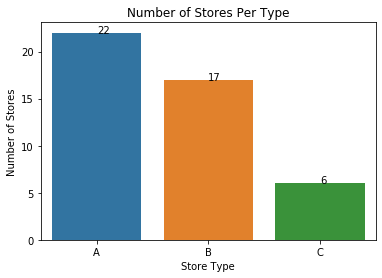

In [213]:
# Bar graph to visualize the number of stores for each Type
fig = plt.subplots( figsize = (6,4))

sns.barplot(x = 'Type', y = 'Store',data = store_type)
plt.title("Number of Stores Per Type")
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')

for index,data in enumerate(store_type['Store']):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=10))


From the graph we can see that Store Type A consists of the most number of stores and type c consists of the least 

In [214]:
# The total number of stores per each type 
storey = stores.groupby("Type").sum().reset_index()
storey

,Type,Store,Size
0,A,489,3899450
1,B,312,1720242
2,C,234,243250


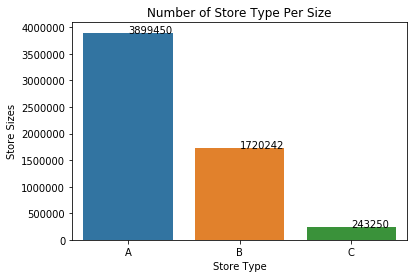

In [215]:
# Bar graph to visualize the number of stores per Size
fig = plt.subplots( figsize = (6,4))

sns.barplot(x = 'Type', y = 'Size',data = storey)
plt.title("Number of Store Type Per Size")
plt.xlabel('Store Type')
plt.ylabel('Store Sizes')

for index,data in enumerate(storey['Size']):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=10))


In [216]:
# Each column has 0 missing values
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

# Sales

In [235]:
sales = pd.read_csv(r"C:\Users\PRISCILLA\Downloads\Retail data\sales data-set.csv")

In [236]:
# Consists of 42150 rows and 5 columns
sales.shape

(421570, 5)

In [237]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [239]:
sales["Date"] = pd.to_datetime(sales.Date)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [240]:
# Each column has 0 missing values
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

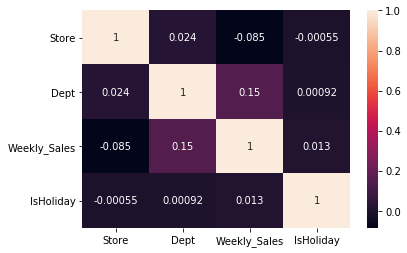

In [241]:
#Identifying the correlation/ relationships between the variables in the sales table
salescorr = sales.corr()
sns.heatmap(salescorr, annot = True)
plt.show()

It can be identified that the highest corrleation exists between Weekly_Sales and Department(0.15),
weekly sales and store (-0.085) and 
Is holidays and Sales have the lowest correlation of (0.013) which is closest to 0.


In [242]:
# Separate the year from the Date
sales['year'] = pd.DatetimeIndex(sales['Date']).year
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year
0,1,1,2010-05-02,24924.50,False,2010
1,1,1,2010-12-02,46039.49,True,2010
2,1,1,2010-02-19,41595.55,False,2010
3,1,1,2010-02-26,19403.54,False,2010
4,1,1,2010-05-03,21827.90,False,2010


In [243]:
# Separate the month from the Date
sales['month'] = pd.DatetimeIndex(sales['Date']).month
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month
0,1,1,2010-05-02,24924.50,False,2010,5
1,1,1,2010-12-02,46039.49,True,2010,12
2,1,1,2010-02-19,41595.55,False,2010,2
3,1,1,2010-02-26,19403.54,False,2010,2
4,1,1,2010-05-03,21827.90,False,2010,5


Text(0.5, 1.0, 'SALES PER MONTH')

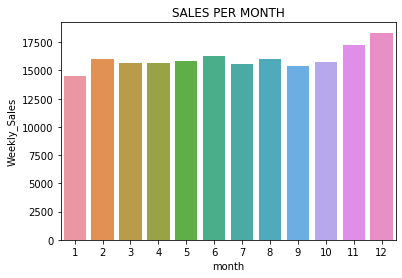

In [244]:
# Bar Plot for sales per month
sns.barplot(x = "month", y = "Weekly_Sales",ci = None, data = sales)
plt.title("SALES PER MONTH")

December(Chrismas season) records the highest sales followed by November)(Thanks Giving) and the June from the graph

From the graph it is easily noticable that the month of December(12) experienced the most sales,
and January(1) had the least sales

In [245]:
# Converting the sales figures into smaller figures for a clearer view
sales.Weekly_Sales = (sales.Weekly_Sales /10000).round()
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month
0,1,1,2010-05-02,2.0,False,2010,5
1,1,1,2010-12-02,5.0,True,2010,12
2,1,1,2010-02-19,4.0,False,2010,2
3,1,1,2010-02-26,2.0,False,2010,2
4,1,1,2010-05-03,2.0,False,2010,5


In [246]:
# Grouping the data by year
yearly_sala = sales.groupby("year").sum().reset_index()
yearly_sala

,year,Store,Dept,Weekly_Sales,IsHoliday,month
0,2010,3116269,6210616,223919.0,11774.0,984740
1,2011,3407631,6785352,239285.0,11920.0,1002485
2,2012,2835184,5662854,195521.0,5967.0,743950


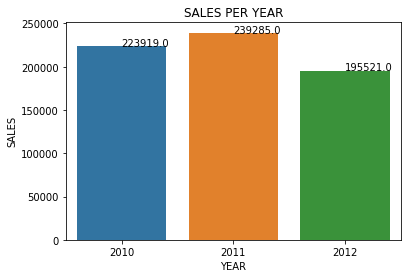

In [247]:
# Bar graph visualizing sales per year
sns.barplot(x = 'year', y = "Weekly_Sales",data = yearly_sala)
plt.title("SALES PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("SALES")

for index,data in enumerate(yearly_sala["Weekly_Sales"]):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=10))

The Sales trend per year reaches its peak in 2011 and then drops by about 44,000 in 2012

In [248]:
# I created 2 new columns in the sales table(year and month)
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month
0,1,1,2010-05-02,2.0,False,2010,5
1,1,1,2010-12-02,5.0,True,2010,12
2,1,1,2010-02-19,4.0,False,2010,2
3,1,1,2010-02-26,2.0,False,2010,2
4,1,1,2010-05-03,2.0,False,2010,5


In [249]:
# Remove/Drop new columns(year & month)
sales.drop(columns = ['year','month'],inplace = True)


In [250]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,2.0,False
1,1,1,2010-12-02,5.0,True
2,1,1,2010-02-19,4.0,False
3,1,1,2010-02-26,2.0,False
4,1,1,2010-05-03,2.0,False


From the graph,it can be seen that 2011 was the year with the highest sales made 
2012 was the year with the lowest sales

# Features

In [251]:
features = pd.read_csv(r"C:\Users\PRISCILLA\Downloads\Retail data\Features data set.csv")


In [252]:
features.shape

(8190, 12)

In [253]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [254]:
features["Date"] = pd.to_datetime(features.Date)

In [255]:
features["YEAR"] = pd.DatetimeIndex(features["Date"]).year
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,YEAR
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010


In [256]:
YEARA = features.groupby(['YEAR']).sum().reset_index()
YEARA

,YEAR,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010,49680,130176.63,6099.337,0.00,0.00,0.00,0.00,0.00,363099.848068,18344.263,180.0
1,2011,53820,137588.56,8334.881,1526536.00,2222560.37,2669330.76,455354.16,2206157.81,401416.975385,18911.964,180.0
2,2012,53820,141716.33,8592.677,16436842.49,4765018.77,3469583.51,6445235.52,10343577.98,411176.892813,17034.563,180.0
3,2013,31050,76645.74,4868.178,10391144.55,2897600.69,220327.68,4506140.23,4185740.72,135870.737569,5232.184,45.0


Text(0.5, 1.0, 'Trend in Fuel Prices')

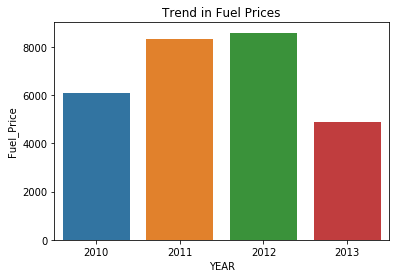

In [33]:
sns.barplot(x = "YEAR", y = "Fuel_Price",ci = None, data = YEARA)
plt.title("Trend in Fuel Prices")

From the bar graph and chart above we identify that the features column consists of dates from 2010 to 2013 

In [257]:
# We then drop the YEAR Column after analysis
features.drop(columns = ['YEAR'],inplace = True)


In [258]:
features.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


# Merging Stores & Sales Tables

In [259]:
#Skip
df1=stores.merge(sales,on='Store',how='right')
df1.sort_values("Date")

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
320135,33,A,39690,96,2010-01-10,1.0,False
166671,17,B,93188,93,2010-01-10,0.0,False
292156,30,C,42988,85,2010-01-10,0.0,False
292297,30,C,42988,87,2010-01-10,0.0,False
84936,9,B,125833,55,2010-01-10,1.0,False
...,...,...,...,...,...,...,...
8509,1,A,151315,82,2012-12-10,2.0,False
86278,9,B,125833,81,2012-12-10,0.0,False
178185,19,A,203819,7,2012-12-10,3.0,False
20008,2,A,202307,95,2012-12-10,15.0,False


In [260]:
#Groupoing the data by Type we can easily see that Type A is the large
sale_by_type = df1.groupby("Type").sum().reset_index()
sale_by_type

,Type,Store,Size,Dept,Weekly_Sales,IsHoliday
0,A,4683720,39266832934,9615093,427108.0,15185.0
1,B,3016551,16646854214,7048641,191863.0,11512.0
2,C,1658813,1726700290,1995088,39754.0,2964.0


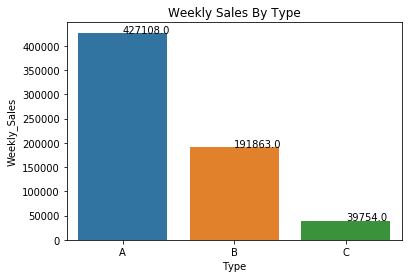

In [261]:
#Visualizing Weekly Sales Per Type
sns.barplot ( x = "Type", y = "Weekly_Sales", data = sale_by_type)
plt.title("Weekly Sales By Type")

for index,data in enumerate(sale_by_type["Weekly_Sales"]):
    plt.text(x=index , y = data , s = data , fontdict=dict(fontsize=10))

We identified from the graph above that Type (A) made the most sales over the past 3 years and Type (C) made the least

In [262]:
df1.shape

(421570, 7)

In [263]:
df1.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [417]:
# Mergins df1 and the features table on the columns they have in common
df=df1.merge(features,on=['Store','Date','IsHoliday'],how='left')


In [418]:
#Assigning the target variable to y
a = df['Weekly_Sales']

In [419]:
#We convert all negatives columns to positive in order to engage in univariate feature selection
df['Temperature'] = df['Temperature'].abs()

In [420]:
#We drop all columns with missing values, the target column and the date
b = df.drop(columns =['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales'] )

In [421]:
b.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [422]:
b.shape

(421570, 9)

In [423]:
a.shape

(421570,)

In [372]:
# Library required for converting categorical data into binary
from sklearn.preprocessing import LabelEncoder

In [424]:
cols = ['IsHoliday', 'Type']
le = LabelEncoder()
for i in cols:
    b[i] = le.fit_transform(list(b[i]))

In [414]:
# Libraries required for univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [425]:
# Using the SelectKBest for feature selection the top features are selected
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(b,a)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(b.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 9 best features

          Specs         Score
2          Size  8.741763e+08
3          Dept  2.981002e+05
0         Store  3.212346e+04
1          Type  1.354645e+04
7           CPI  6.985429e+03
5   Temperature  2.249116e+03
4     IsHoliday  4.896840e+02
8  Unemployment  3.433021e+02
6    Fuel_Price  4.526138e+00


From the results above i identified that the Size had the highest score whilst Fuel price had the lowest score in terms of relation to the target variable (weekly sales)

In [265]:
dataa.shape

(423325, 16)

# Performing an Outer Merge of the Data set

In [437]:
 dataa = pd.merge(df1, features, how='outer')

In [438]:
dataa.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
dtype: int64

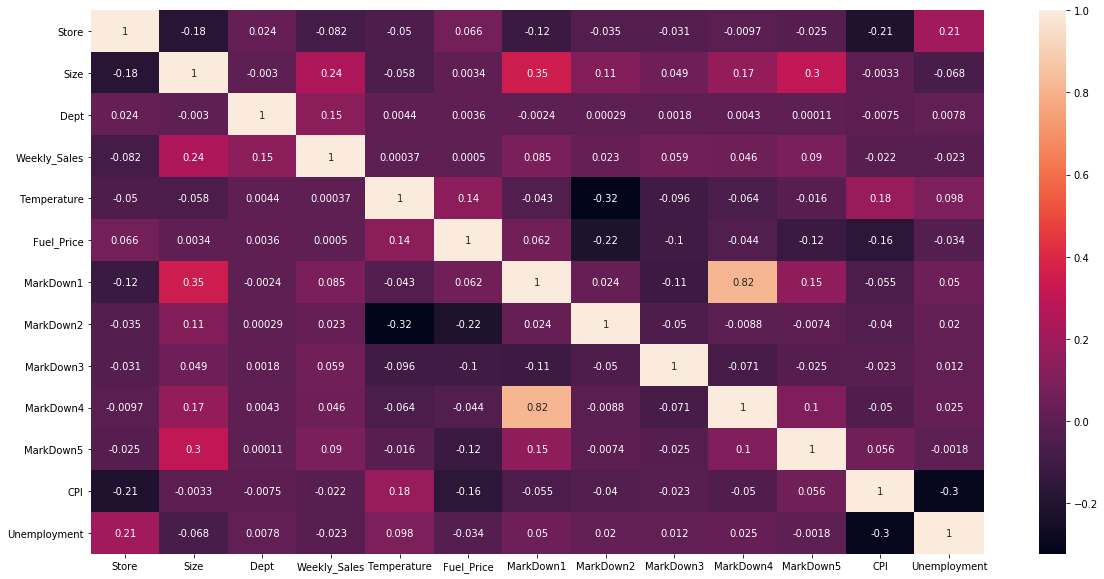

In [439]:
# Correlation matrix is used here to identify the value of the relationship each column has to our 
# target variable (Weekly_Sales)
datacorr = dataa.corr()
fig = plt.subplots( figsize = (20,10))
sns.heatmap(datacorr, annot = True)
plt.show()

From the correlation we identify that the
Dept has a high correlation of                 0.15 
Size has a high correlation of                 0.24
Markdown has a correlation of ranging from 0.02 to 0.09
CPI has a correlation of                      -0.02
Unemployment has a correlation of             -0.023
Fuel price has a correlation of                0.0005
Temperature has the lowest corrleation         0.00037

I also identified that since the Type column and Isholidays are both categorical in nature, they did not show up as part of the corrleation matrix.


# Converting Categorical columns into numerical Columns

The missing values forms the category which is 1755 in number.

I chose to add all missing values to the most fequently occurring category, which is A

In [440]:
# Replacing all NaN with the most frequently occuring Type which is A
dataa["Type"].fillna("A", inplace = True) 

In [441]:
dataa["Type"].value_counts()

A    217233
B    163495
C     42597
Name: Type, dtype: int64

In [442]:
dataa.isnull().sum()

Store                0
Type                 0
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
dtype: int64

In [443]:
# Library required for converting categorical data into binary
from sklearn.preprocessing import LabelEncoder

In [444]:
cols = ['IsHoliday', 'Type']
le = LabelEncoder()
for i in cols:
    dataa[i] = le.fit_transform(list(dataa[i]))

In [445]:
dataa["IsHoliday"].value_counts()

0    393529
1     29796
Name: IsHoliday, dtype: int64

In [446]:
dataa["Type"].value_counts()

0    217233
1    163495
2     42597
Name: Type, dtype: int64

In [447]:
#Using the mean to impute for the columns with missing values

dataa['CPI'].fillna((dataa['CPI'].mean()), inplace=True)
dataa['Unemployment'].fillna((dataa['Unemployment'].mean()), inplace=True)
dataa['Size'].fillna((dataa['Size'].mean()), inplace=True)
dataa['Dept'].fillna((dataa['Dept'].mean()), inplace=True)

In [448]:
# We identify the left over columns after taking out data with 80% or more missing values.
df_null = pd.DataFrame({'Count': dataa.isnull().sum(), 'Percent': 100*dataa.isnull().sum()/len(dataa)})

#printing columns with null count more than 0
df_null[df_null['Count'] > 0]

,Count,Percent
Weekly_Sales,1755,0.414575
MarkDown1,270892,63.991496
MarkDown2,310793,73.417115
MarkDown3,284667,67.245497
MarkDown4,286859,67.763302
MarkDown5,270138,63.813382


The MarkDown columns consist of missing values ranging from 60% to 75% percent of the  dataset 

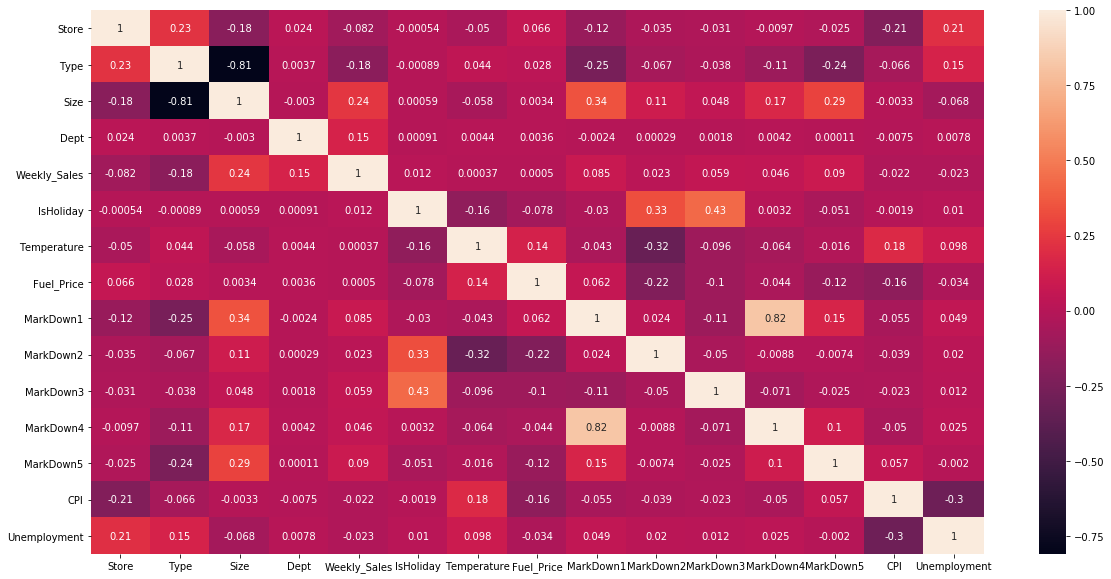

In [449]:
# Correlation matrix is used here to identify the value of the relationship each column has to our 
# target variable (Weekly_Sales)
datacorr = dataa.corr()
fig = plt.subplots( figsize = (20,10))
sns.heatmap(datacorr, annot = True)
plt.show()

# Time Series

In [450]:
dataa['month'] = pd.DatetimeIndex(dataa['Date']).month
dataa['year'] = pd.DatetimeIndex(dataa['Date']).year
dataa['day'] = pd.DatetimeIndex(dataa['Date']).day
dataa.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,month,year,day
0,1,0,151315.0,1.0,2010-05-02,2.0,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2
1,1,0,151315.0,2.0,2010-05-02,5.0,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2
2,1,0,151315.0,3.0,2010-05-02,1.0,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2
3,1,0,151315.0,4.0,2010-05-02,4.0,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2
4,1,0,151315.0,5.0,2010-05-02,3.0,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2010,2


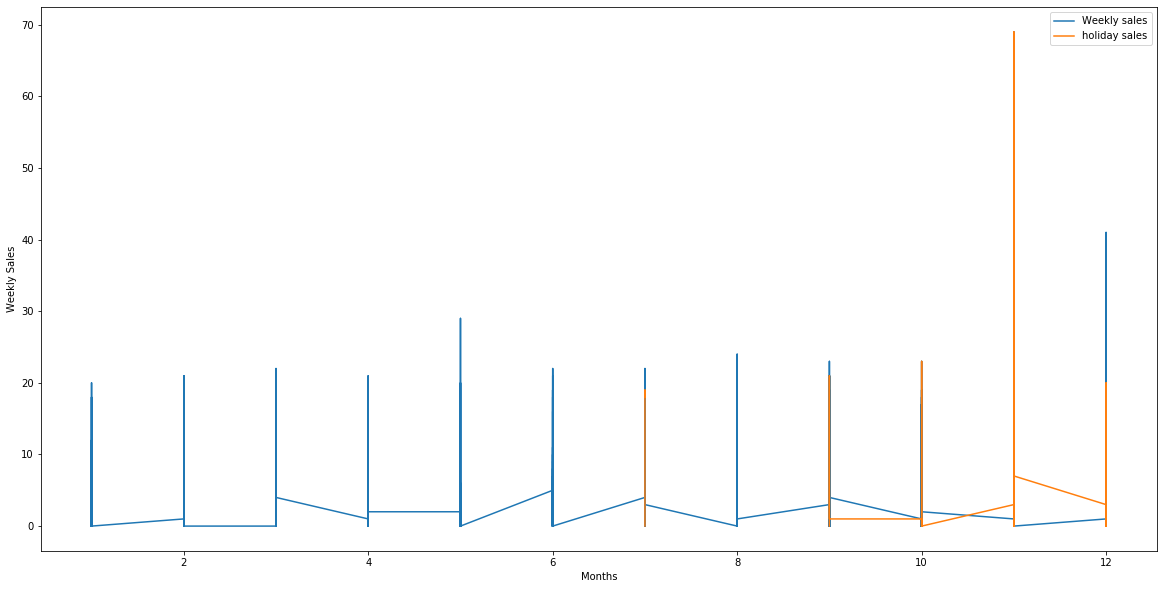

In [451]:
#Creating a line plot of the sales over the years
fig, ax = plt.subplots(figsize = (20,10))

retail_data = dataa.sort_values( by ="month" )
plt.plot(retail_data.month, retail_data["Weekly_Sales"], label = 'Weekly sales')
plt.xlabel('Months')
plt.ylabel('Weekly Sales')


holiday_sales_data = retail_data[retail_data.IsHoliday==True]

plt.plot(holiday_sales_data.month ,holiday_sales_data['Weekly_Sales'], label = 'holiday sales')

plt.legend(loc = 'best')

 July, September, October, November, December

These are the months where Holidays = True

We identified that there was a spike in sails for these months especially november

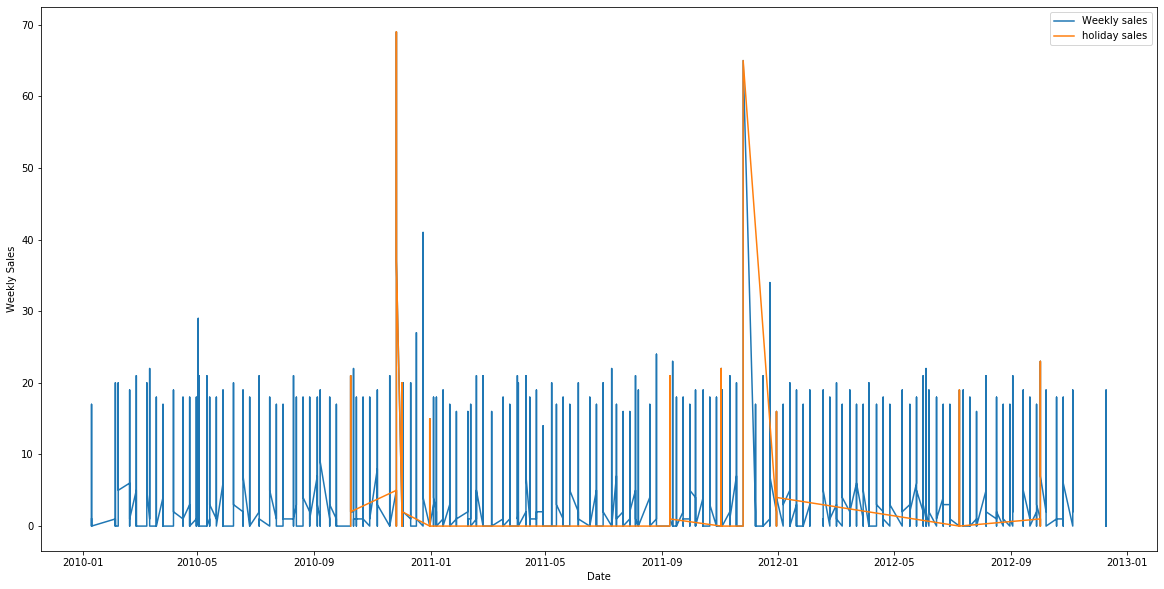

In [452]:
#Creating a line plot of the sales over the years
fig, ax = plt.subplots(figsize = (20,10))

retail_data = dataa.sort_values( by ="Date" )
plt.plot(retail_data.Date, retail_data["Weekly_Sales"], label = 'Weekly sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')


holiday_sales_data = retail_data[retail_data.IsHoliday==True]

plt.plot(holiday_sales_data.Date ,holiday_sales_data['Weekly_Sales'], label = 'holiday sales')

plt.legend(loc = 'best')

In [471]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [432]:
# we assign data without missing values to the train variable and 
# data with missing values to the test set, since that is what we intend to predict
train = dataa[dataa.Weekly_Sales.notnull()]
test = dataa[dataa.Weekly_Sales.isnull()]

In [463]:
X = train.drop(['Weekly_Sales','Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = True)
y = train['Weekly_Sales']

X_test = test.drop(['Weekly_Sales','Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [464]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 421570 to 423324
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1755 non-null   int64  
 1   Type          1755 non-null   int64  
 2   Size          1755 non-null   float64
 3   Dept          1755 non-null   float64
 4   IsHoliday     1755 non-null   int64  
 5   Temperature   1755 non-null   float64
 6   Fuel_Price    1755 non-null   float64
 7   CPI           1755 non-null   float64
 8   Unemployment  1755 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 137.1 KB


In [468]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [473]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
mean_absolute_error (y_test,y_pred)

1.500809839664543

In [476]:
from sklearn.model_selection import cross_val_score

In [477]:
X = train.drop(['Weekly_Sales','Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = True)
y = train['Weekly_Sales']

In [478]:
multireg = LinearRegression()

In [479]:
cross_val_score(multireg, X,y, cv = 5)

array([ 0.1246119 ,  0.03897925,  0.02223565,  0.07922088, -0.00144943])

In [480]:
cross_val_score(multireg, X,y, cv = 5).mean()

0.05271964870850312